In [91]:
from koala import quasicrystals
import numpy as np
from matplotlib import pyplot as plt
from koala import plotting as pl
from koala import graph_utils as gl

<AxesSubplot:>

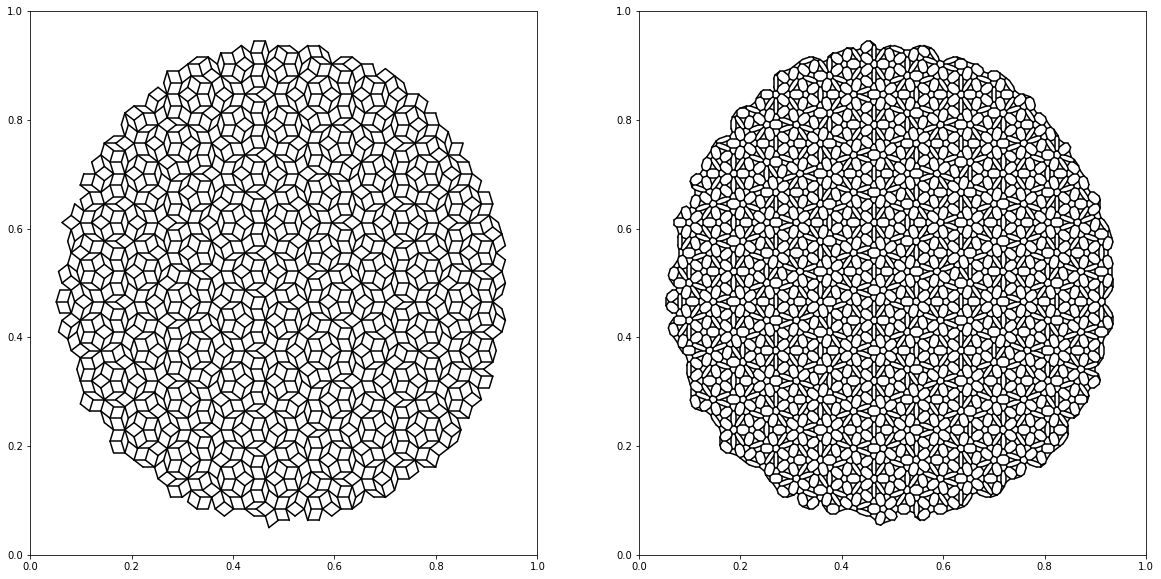

In [92]:


lattice = quasicrystals.penrose_tiling(17)



over_coordinated = np.where(lattice.vertices.coordination_numbers > 3)[0]


over_coordinated = np.arange(lattice.n_vertices)
fixed = gl.vertices_to_polygon(lattice, over_coordinated)



<AxesSubplot:>

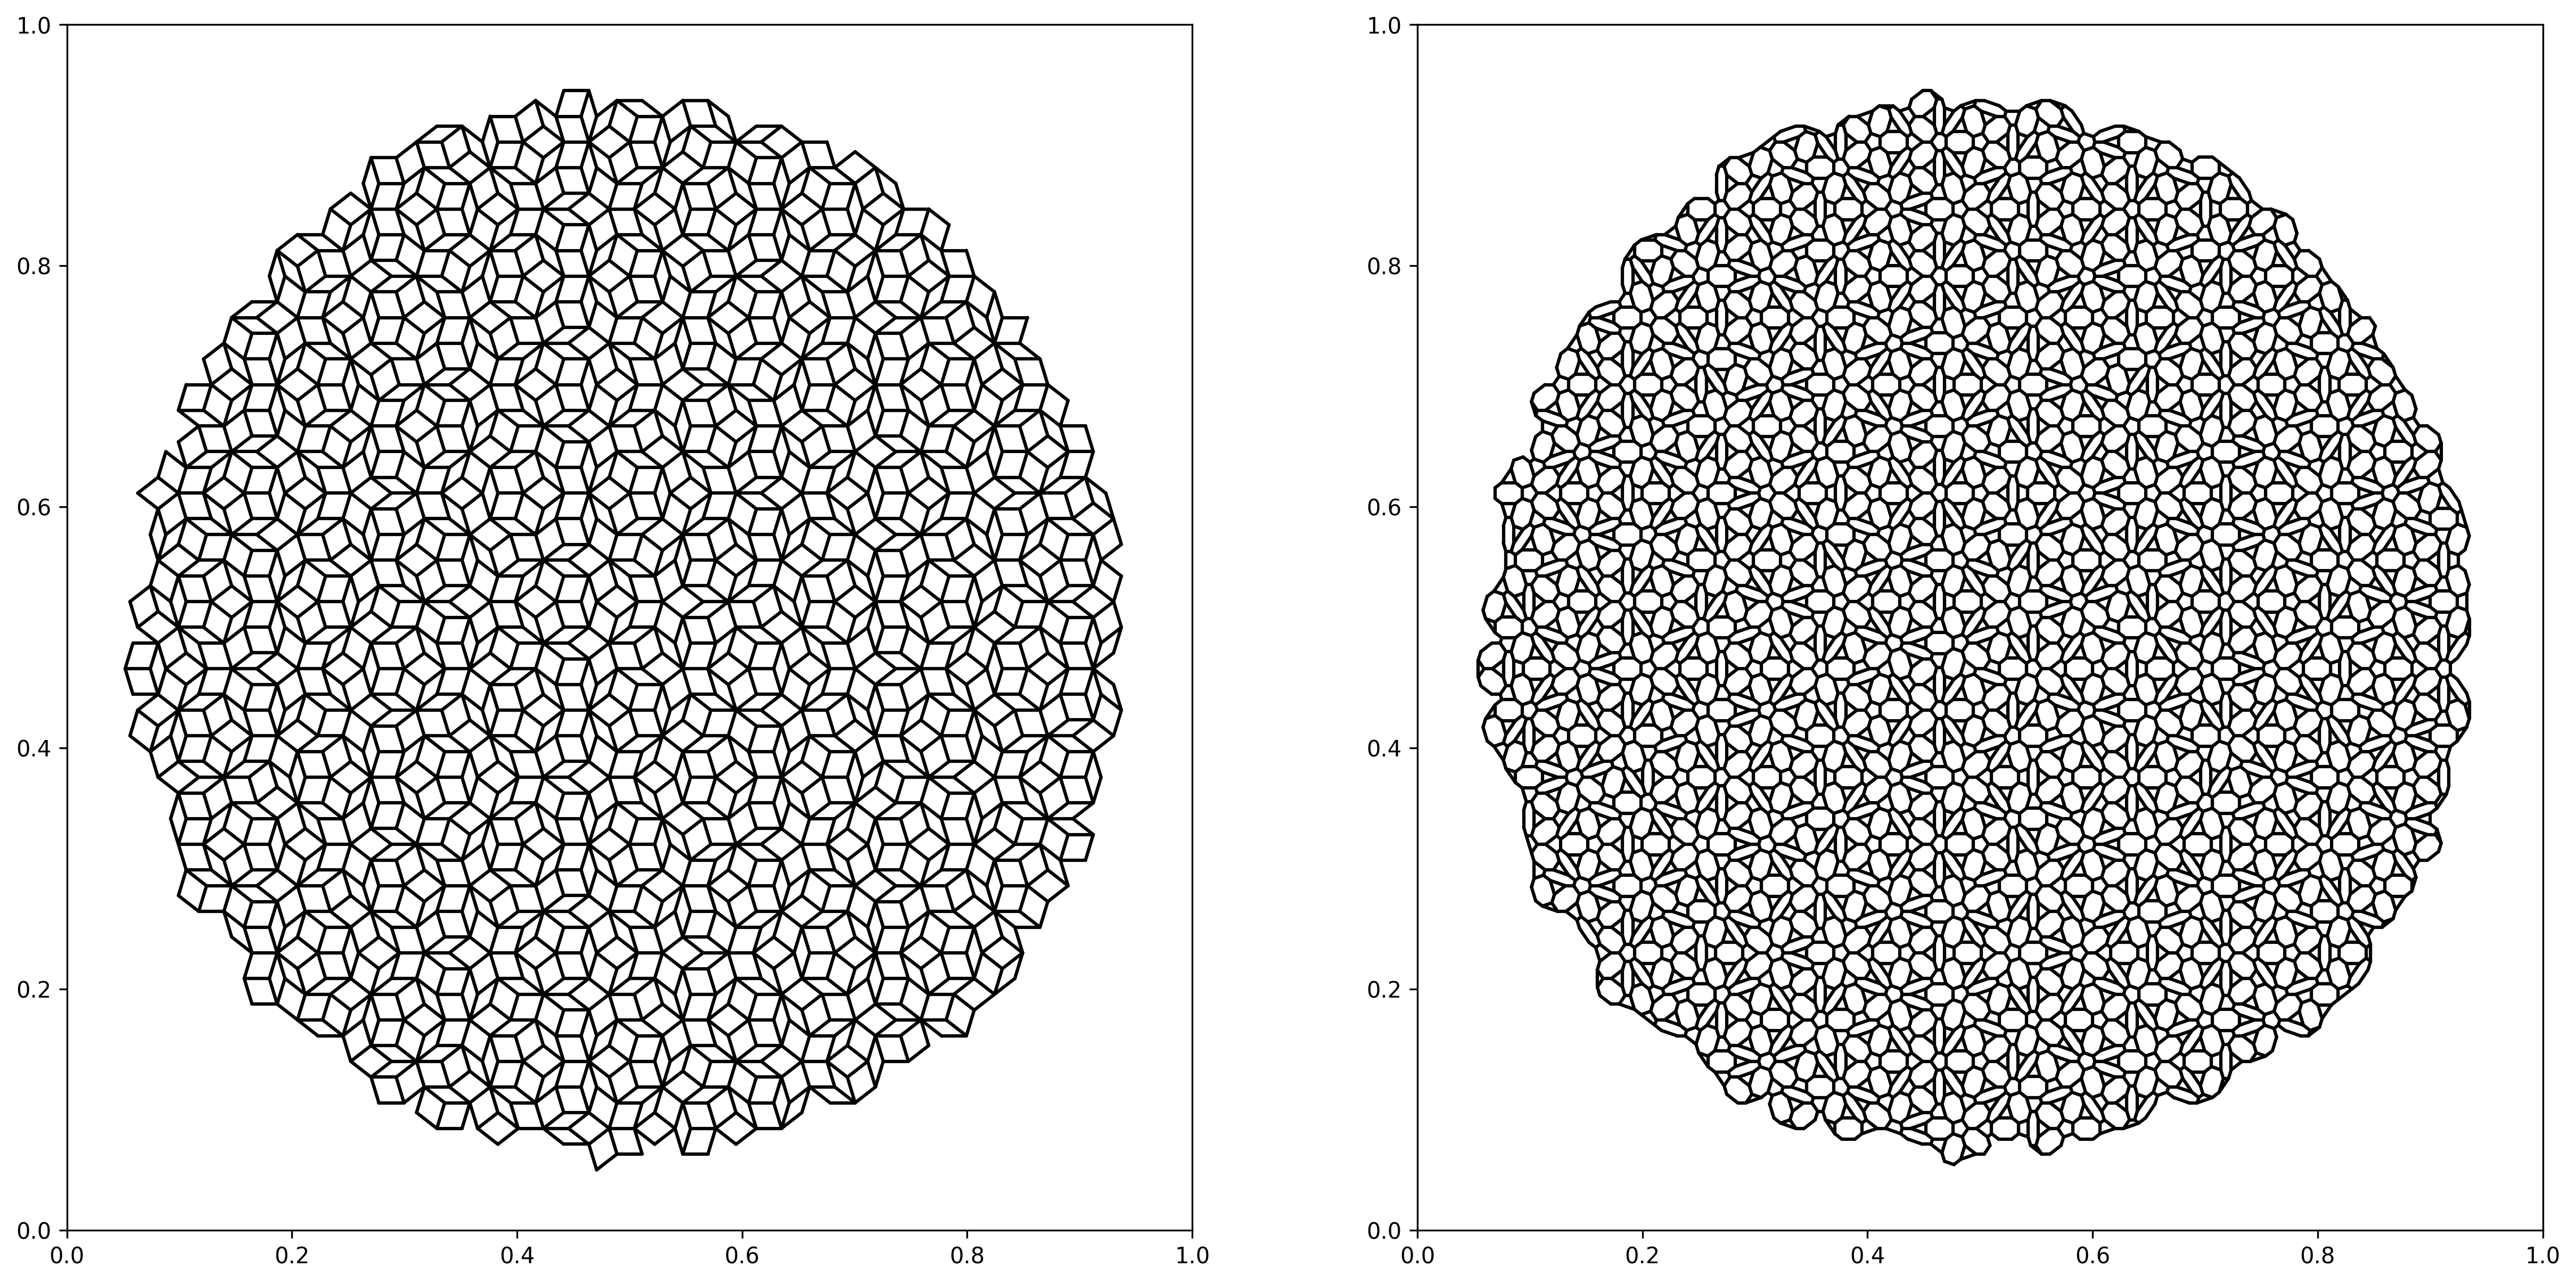

In [120]:


fig,ax = plt.subplots(1,2,figsize = (20,10), dpi= 300)
pl.plot_edges(lattice, ax = ax[0])
pl.plot_edges(fixed, ax = ax[1])


<AxesSubplot:>

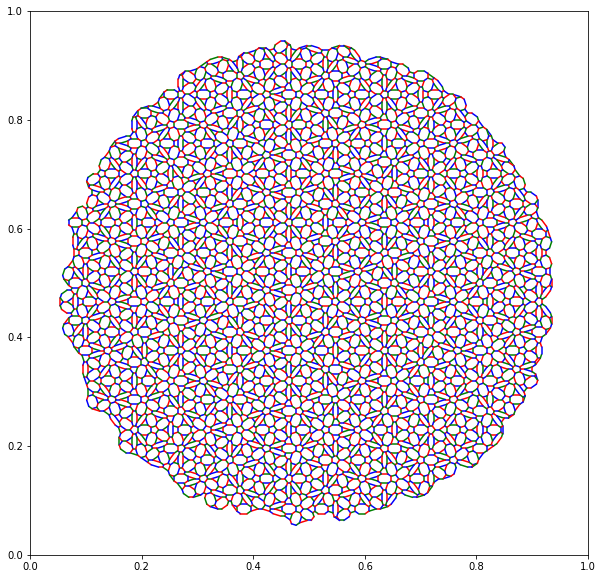

In [93]:
from koala import flux_finder
from koala.graph_color import color_lattice


coloring = color_lattice(fixed)

fig,ax = plt.subplots(figsize = (10,10))
pl.plot_edges(fixed, coloring, color_scheme= ['r', 'b', 'g'])


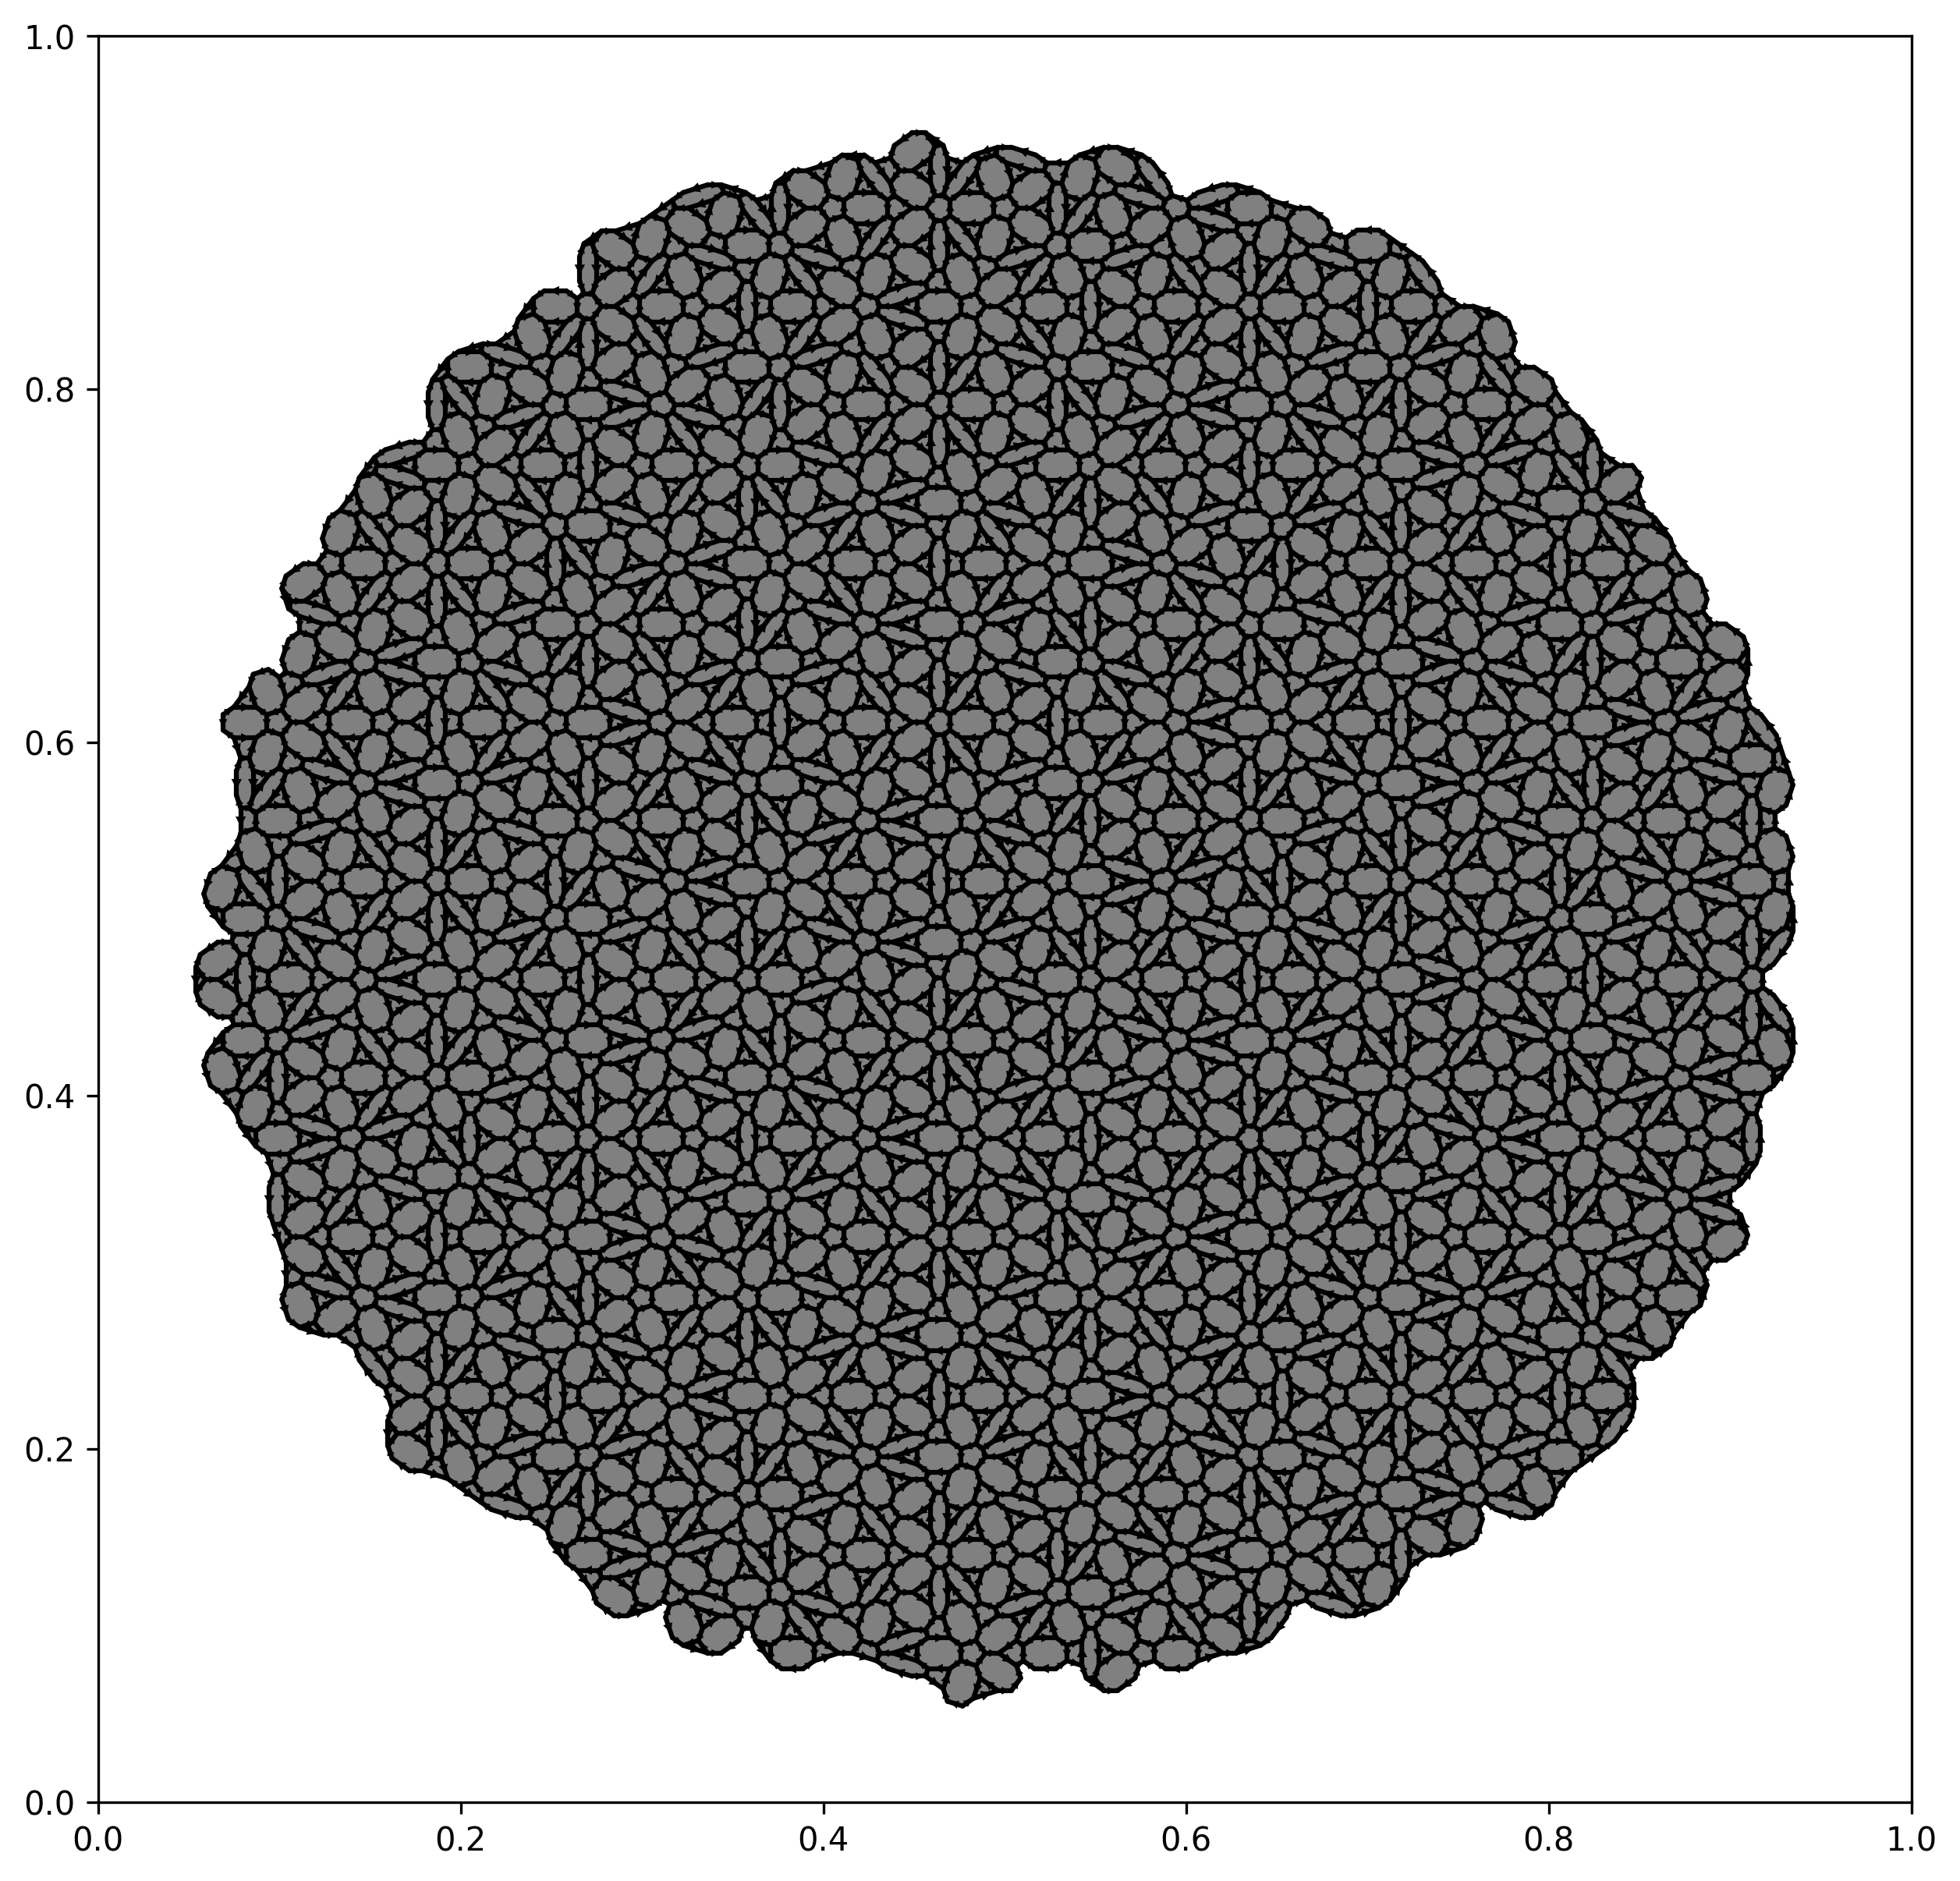

In [94]:
ground_fluxes = np.array([-1]*fixed.n_plaquettes)
ujk = flux_finder.ujk_from_fluxes(fixed, ground_fluxes)

fluxes = flux_finder.fluxes_from_ujk(fixed, ujk)


fig,ax = plt.subplots(1,1,figsize = (10,10), dpi = 300)
pl.plot_edges(fixed, directions = ujk)
pl.plot_plaquettes(fixed, flux_finder.fluxes_to_labels(fluxes), color_scheme= ['w', 'grey'])
plt.show()



In [95]:
from koala.hamiltonian import majorana_hamiltonian
from  scipy import linalg as la

J = np.array([1,1,1])

H = majorana_hamiltonian(fixed, coloring, ujk, J)

e,v = la.eigh(H)

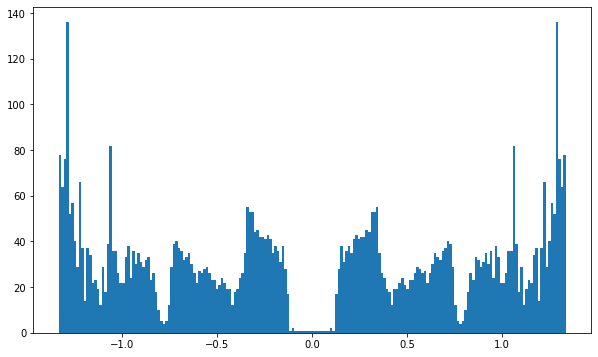

In [98]:
fig, ax = plt.subplots(figsize = (10,6))

plt.hist(e, bins=200)
plt.show()



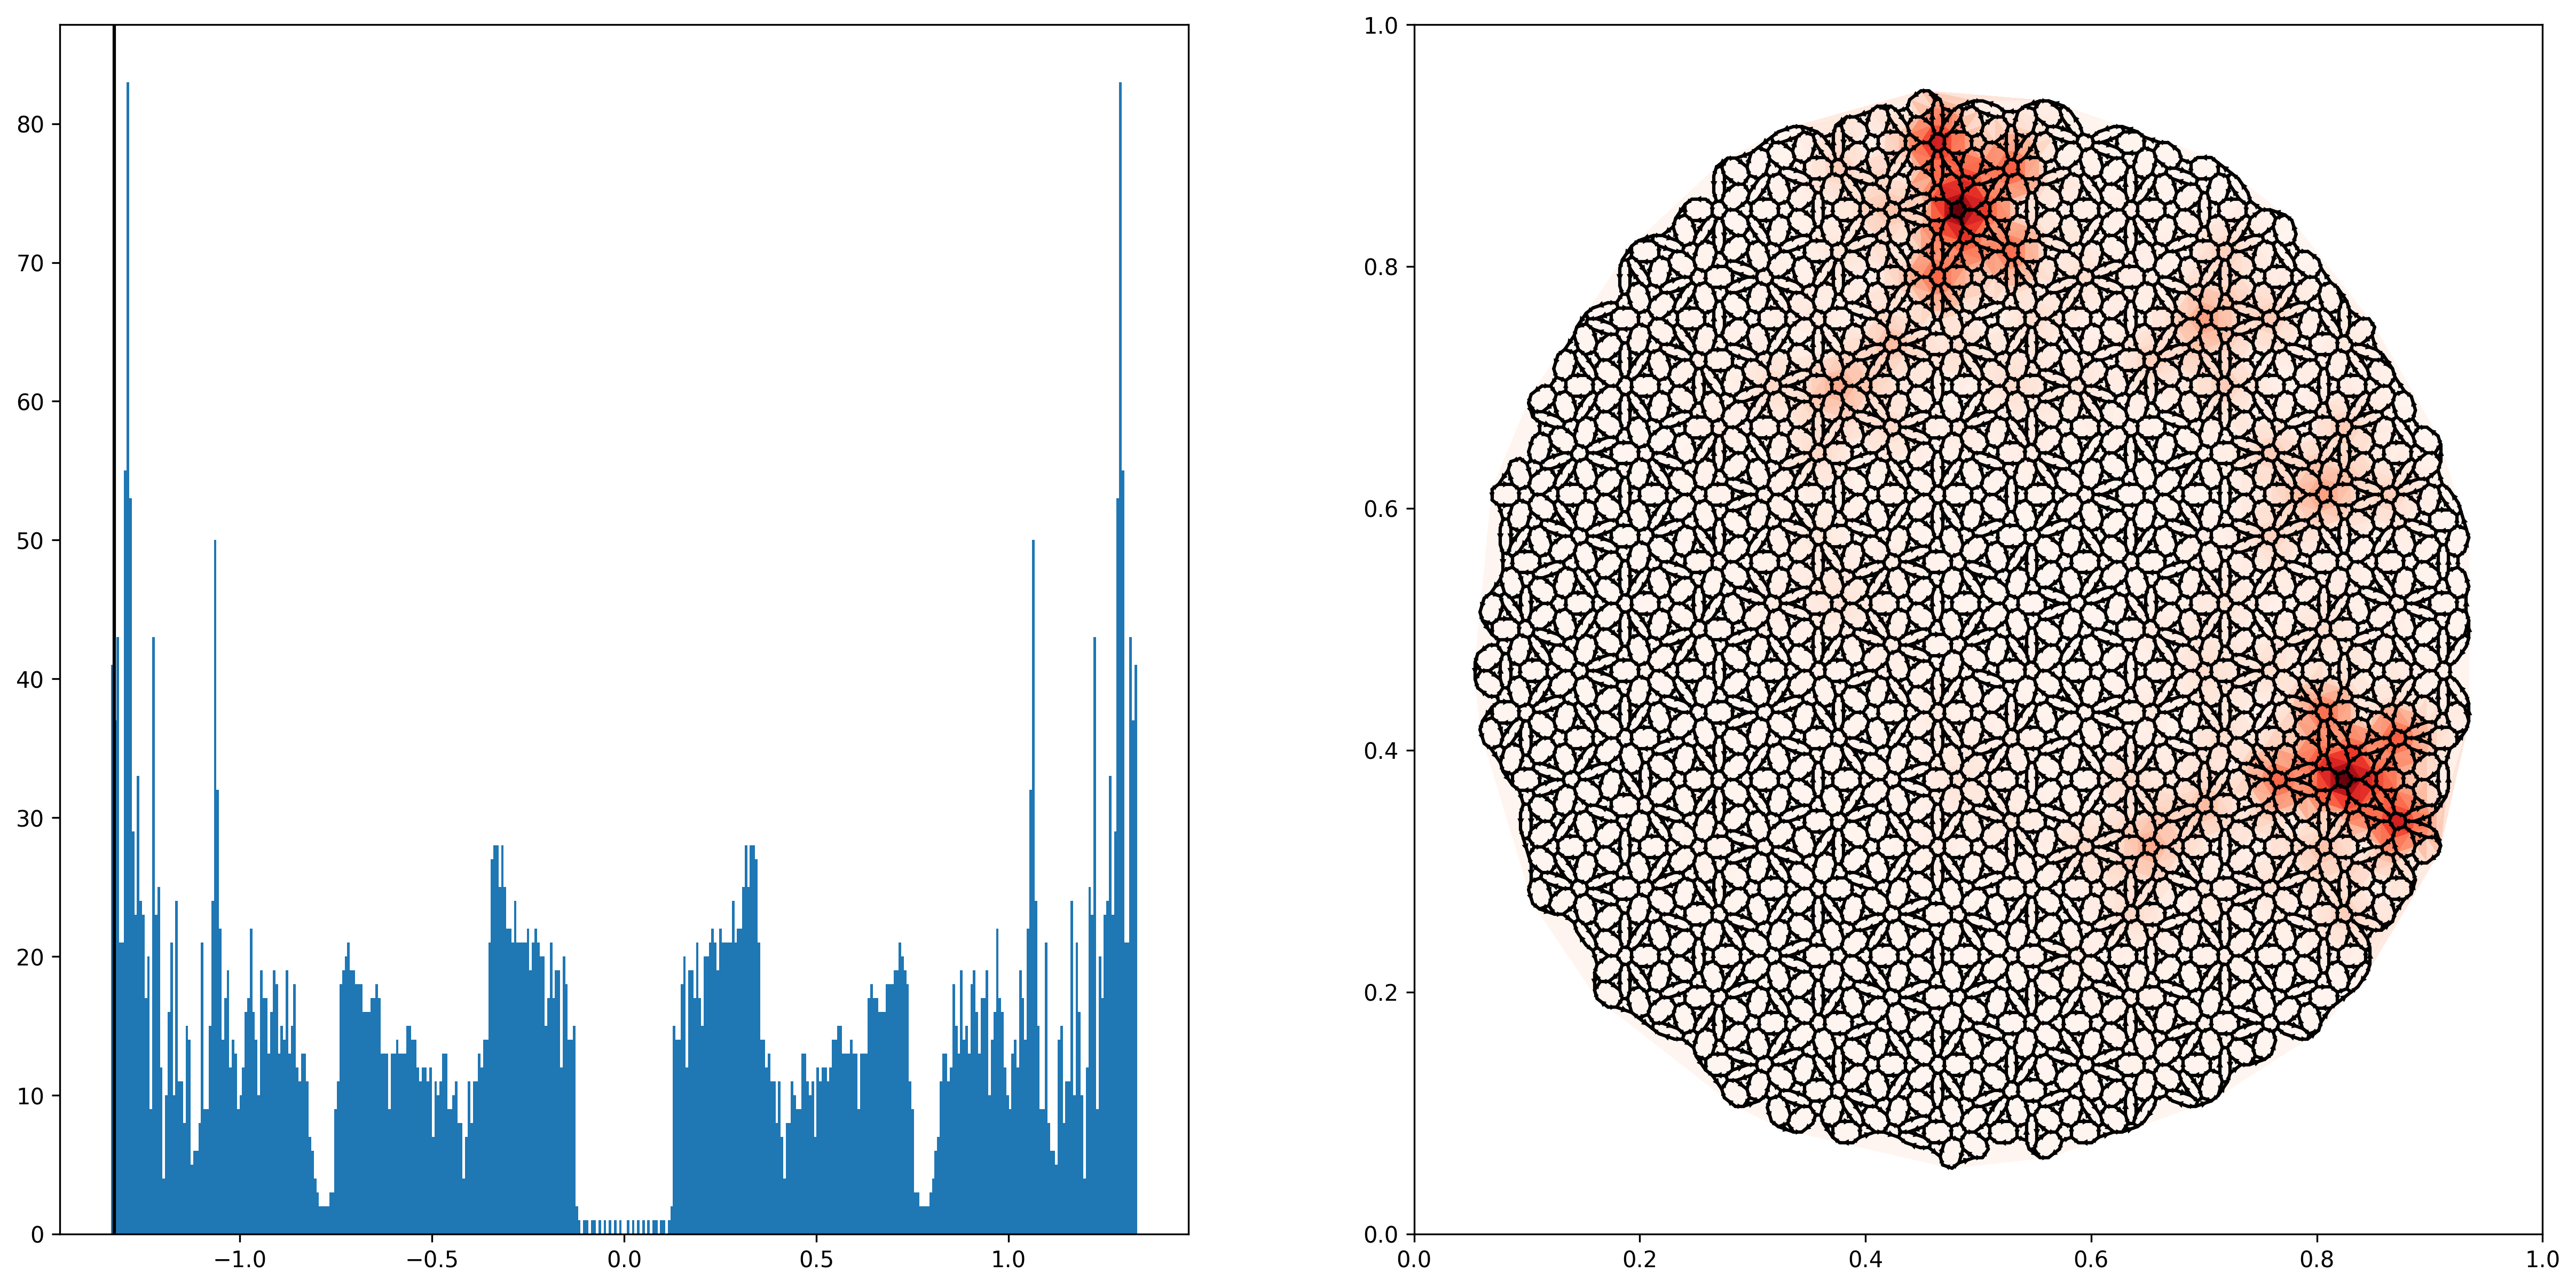

In [121]:
from matplotlib.colors import TwoSlopeNorm

fig, axes = plt.subplots(1,2,figsize = (20,10), dpi= 300)

def cmap_index(lattice, index, axis=  None):
    if axis is None:
        axis = plt.gca()
    x_vals = np.array(lattice.vertices.positions)[:,0]
    y_vals = np.array(lattice.vertices.positions)[:,1]

    # norm = TwoSlopeNorm(vmin=np.min(index), vcenter=0, vmax=np.max(index))
    im = axis.tripcolor(x_vals, y_vals, index, cmap= 'Reds')
    return im 

target_energy = 0.15
n = np.argmin(np.abs(e-target_energy))
# n=41

ipr = np.sum((v*np.conj(v))**2, axis = 0)

axes[0].hist(e, bins=400)
axes[0].axvline(e[n], c = 'k')

pl.plot_edges(fixed, directions = ujk, ax=axes[1])
v.shape
cmap_index(fixed, np.abs(v[:, n]),axis = axes[1])

(0.0, 0.005)

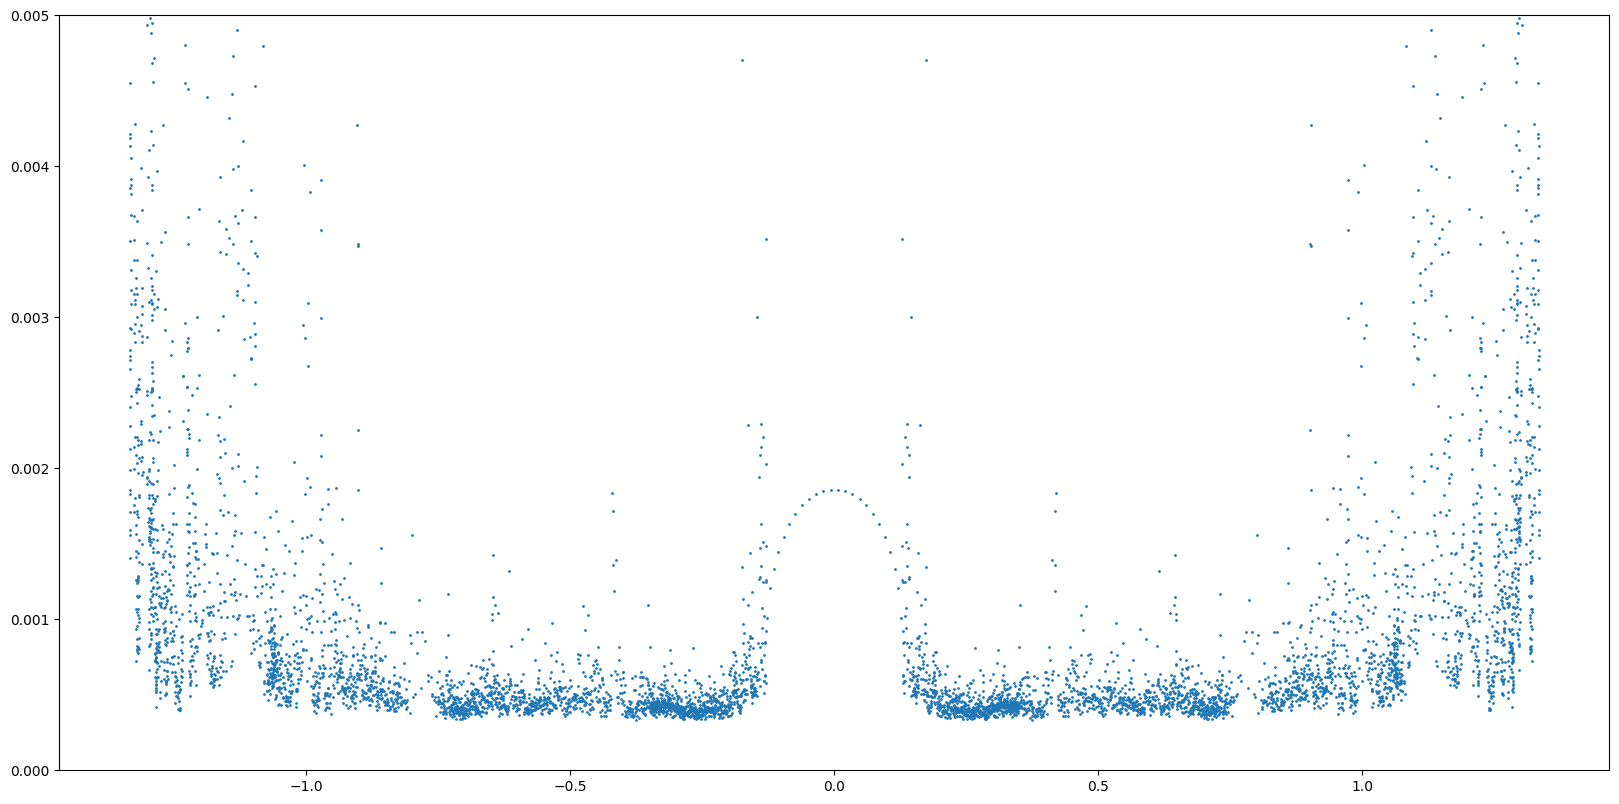

In [116]:
fig, axes = plt.subplots(1,1,figsize = (20,10), dpi= 100)
plt.scatter(e, ipr, s = 1)
plt.ylim(0,0.005)

In [122]:
fixed.n_plaquettes

2968